In [377]:
#importing packages that will be needed for decision tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importtrain_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

<h2> Decision Tree </h2>

<h4> Loading Data </h4>
<p> lets first load the Heart Disease dataset using pandas' read CSV function. </p>

In [378]:
#loading in the data using pandas
heart = pd.read_csv("heart.csv")
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<h4> Feature Selection </h4>
<p> We divide the given columns into two types of variables: target variables or dependent and feature variables that are independent. </p>

In [379]:
#split dataset in features and target variable
feature_cols = ['MaxHR','Age','RestingBP', 'Oldpeak','Cholesterol','FastingBS']
X = heart[feature_cols] # features parameter
y = heart.HeartDisease #target variable

In [194]:
type(heart)


pandas.core.frame.DataFrame

In [195]:
print(heart.keys())

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [380]:
X = heart[feature_cols] # features parameter
y = heart.HeartDisease
df = pd.DataFrame(X, columns = heart['HeartDisease'])

<h4> Splitting the Data </h4>
<p> To understand the model performance, dividing the dataset into training set and a test set is a good strategy</p>
<p> To do so, use the function train_test_splot() from the sklearn package </p>
<p> for this function to work, you need to pass 3 parameters: features, target and test_set size </p>

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test|

<h4> Building the Decision Tree Model </h4>
<p> using sklearn package, create the decision tree model </p>

In [382]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()


# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

<h4> Evaluating Model </h4>
<p>lets estimate, how accurately the classifier or model can predict the type of cultivar. </p>
<p> Here, we are computing accuracy by comparing actual test set values and predicted values </p>

In [383]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6920289855072463


<p> An accuracy of high 60-70 is considered a good accuracy. This accuracy will be improved tuning the parameters in the decision tree </p>

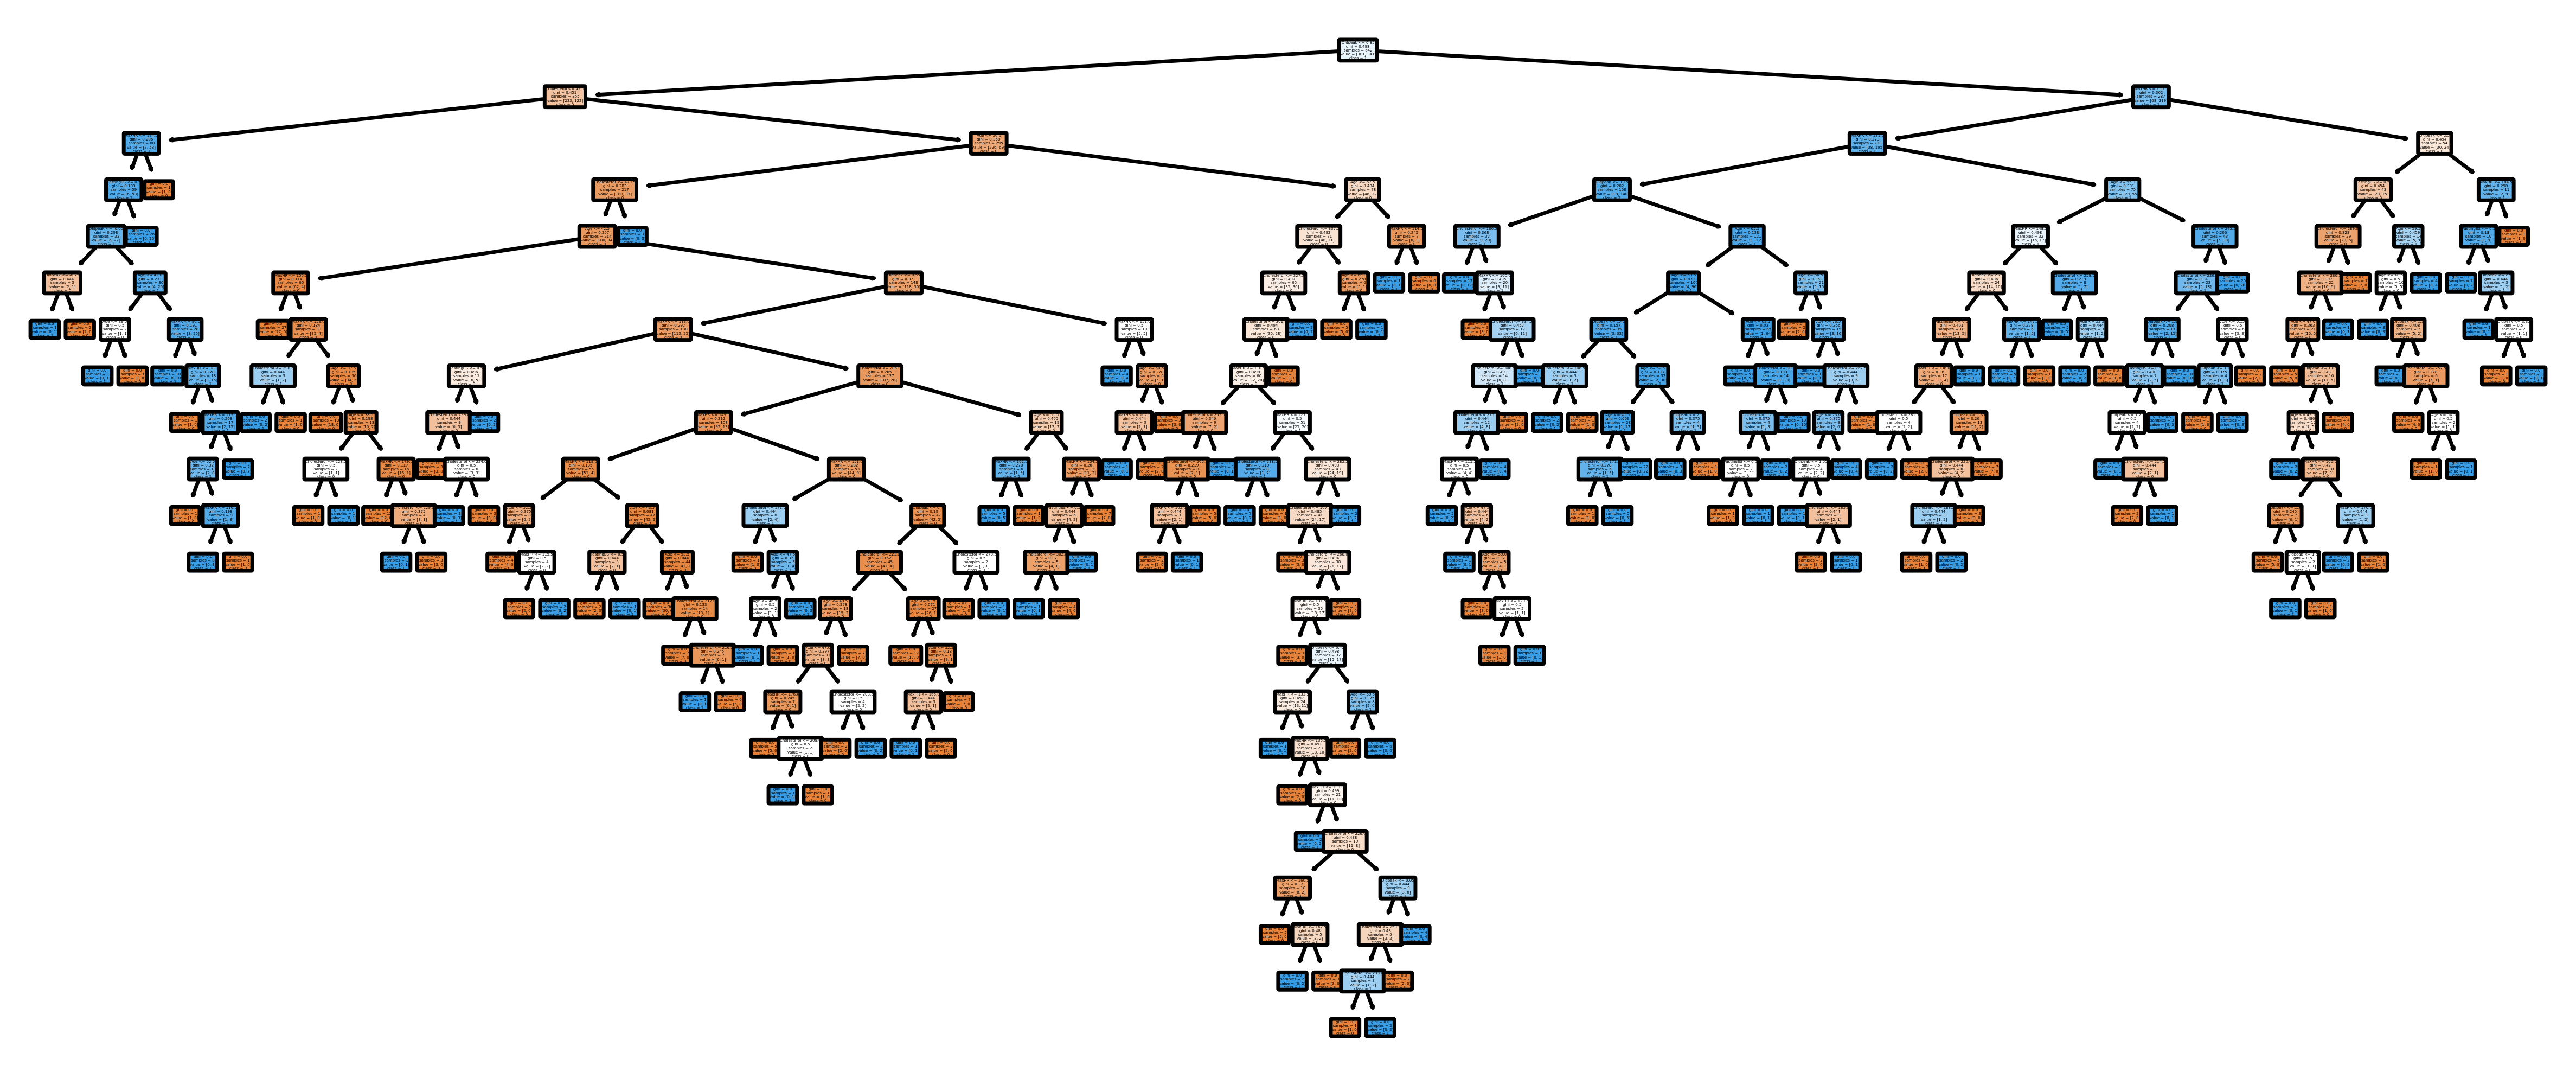

In [76]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi=500)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('graphics/dtree.png')

<p>Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.</p>

<h4> Optimizing Decision Tree Performance </h4>


In [384]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8007246376811594


<p> This accuracy has now been increased by 10% so now it is at an accuracy classification rate of 80.1%. By creating the max depth within our decision tree classifier, it creates a more specific view point instead of having sp many potential outcomes. It allows for more accuracy because of a smaller scope to look at.</p>

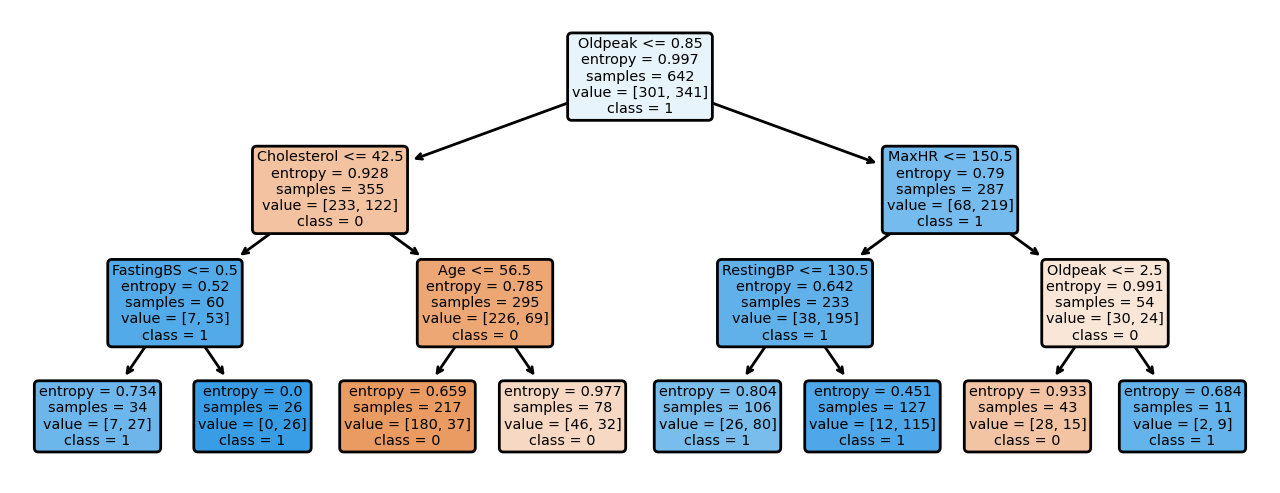

In [171]:
#plotting the new tree with greater accuracy
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('graphics/dtree2.png')

<h4>Breaking down the Decision Tree Model</h4>
<p>


<p> The following terminology is important to understand the findings of the model. The top of the tree (the light blue square on the top) is called the <b>root node</b>. Intermediate <b>nodes</b> have arrows pointing to and away from them. And lastly, the fiinal row contains the <b>leaves</b>. Leaves tell you what class each sample belongs to.</p>

<h5> Breaking Down the Individual Values and Variables</h5>
<p> <b>Entropy</b> measures the impurity of the input set. Informatio gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.</p>

<p><b> Samples</b> shows the amount from the dataset that fits that criterion</p>

<h4> Evaluating Decision Tree by Confusion Matrix</h4>

In [385]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 92,  17],
       [ 38, 129]])

Text(0.5, 257.44, 'Predicted label')

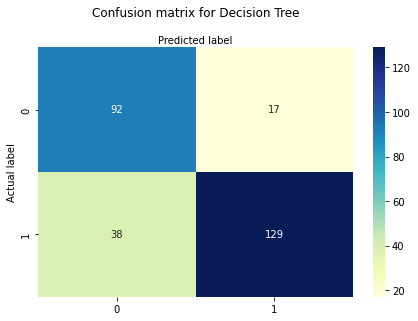

In [386]:
#visualizing the confusion matrix through a heatmap

#import required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

#labeling heat map 
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<p>The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, <b>92</b> and <b>129</b> are actual predictions, and <b>17</b>  and <b>38</b> are incorrect predictions. So, the decision tree was an overall good model to show personality predictions of patients. </p>

In [387]:
#evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
#accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#precision score
print("Precision:",metrics.precision_score(y_test, y_pred))

#recall score
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8007246376811594
Precision: 0.8835616438356164
Recall: 0.7724550898203593


<p>classification rate of 80%, considered as a good accuracy. </p>
<p> Percision, how accurate is the model. In our prediction case, when your Logistic Regression model predicted patients are going to suffer from heart disease, that patients prediction will be correct 88% of the time.</p>
<p> Recall, If there are patients who have heart disease in the test set and your Logistic Regression model can identify it 77% of the time.</p>

In [388]:
#creating classification report 

#importing proper packages for the report
from sklearn.metrics import classification_report

#printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       109
           1       0.88      0.77      0.82       167

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.80      0.80       276



<h2>Gradient Boosting Regression </h2>
<p> Gradient boosting algorithm can be used to train models for both regression and classification problem. Gradient Boosting Regression algorithm is used to fit the model which predicts the continuous value. </p>


In [408]:
#importing packages for gradient boosting regression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

<h4> Splitting the Data </h4>
<p> Similar to the decision tree, we need to split the data into trained and tested variables. In this iteration, we are splitting it 90% training and leaving the rest for testing. </p>

In [390]:
#split dataset in features and target variable
feature_cols = ['MaxHR','Age', 'Oldpeak','Cholesterol','FastingBS']
X = heart[feature_cols] # features parameter
y = heart.HeartDisease #target variable
# Create Training and Test Split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 90% training and 10% test|#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

<h4> Initilizing parameter for the GBR </h4>


In [391]:
# Hyperparameters for GradientBoostingRegressor
gbr_params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 2,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [392]:
# Create an instance of gradient boosting regressor
gbr = GradientBoostingRegressor(**gbr_params)

# Fit the model
gbr.fit(X_train_std, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

In [393]:
# Print Coefficient of determination R^2
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))

# Create the mean squared error
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.445
The mean squared error (MSE) on test set: 0.1334


/Users/abbywillard/.local/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/Users/abbywillard/.local/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


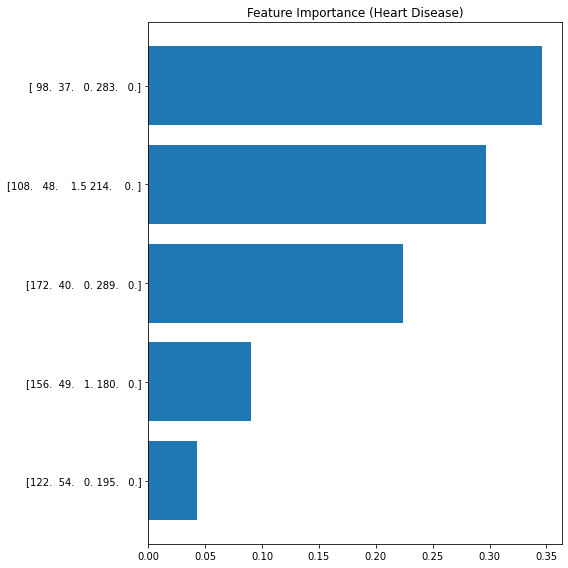

In [394]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(heart[feature_cols])[sorted_idx])
plt.title('Feature Importance (Heart Disease)')
plt.labels=np.array(heart[feature_cols])[sorted_idx]
result = permutation_importance(gbr, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


/Users/abbywillard/.local/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/Users/abbywillard/.local/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


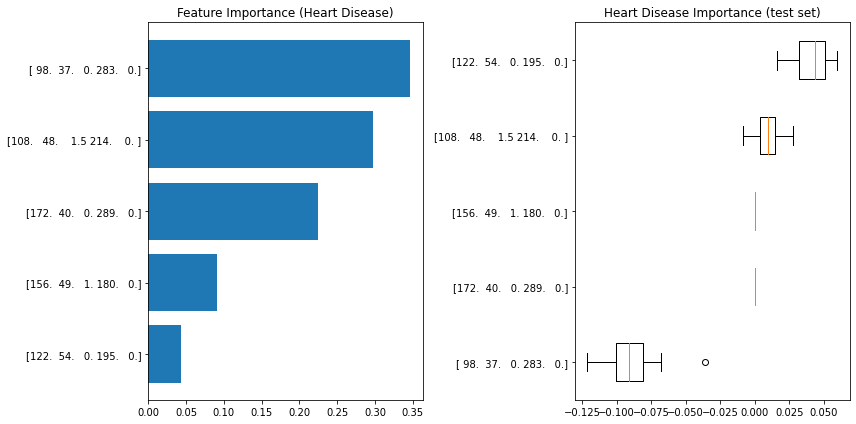

<Figure size 432x288 with 0 Axes>

In [409]:
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(heart[feature_cols])[sorted_idx])
plt.title("Feature Importance (Heart Disease)")

result = permutation_importance(
    gbr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(heart[feature_cols])[sorted_idx],
)
plt.title("Heart Disease Importance (test set)")
fig.tight_layout()
plt.show()
plt.savefig('graphics/gb1.png')

<h4> Showing the Training Deviance </h4>
<p> Here, we visualize the results of our test and training data. The closer the two are to one another, the better the training was. </p>

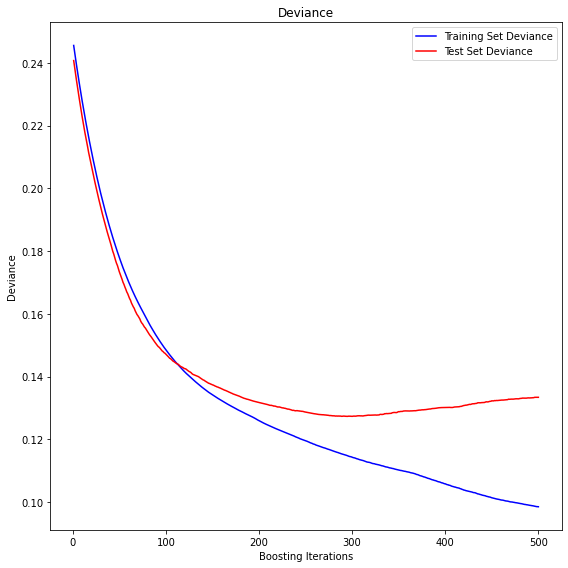

In [396]:
test_score = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test_std)):
    test_score[i] = gbr.loss_(y_test, y_pred)
 
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

<h2> Binary Logistic Regression</h2>

<h4> Assumptions Required for Successful Linear Regression</h4>
<p> binary logisitc regression requires the dependent variable to be binary. In this dataset, the dependent variable is Heart Disease with the binary 0 or 1. </p>
<p> to have a successful regression, only meaningful variables should be included. For this dataset, I will take the following to be meaningful variables
    <ul>
        <li>Sex</li>
        <li>Age</li>
        <li>RestingBP</li>
        <li>Old Peak</li>
        <li>Heart Disease</li></ul>
The variables should be independent of each other, here, the variables are. 
Logistic Regressions require large sample sizes. This dataset has 900+ observarions and so is large enough for such regression.</p>
     

In [400]:
#importing packages from linear regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#using the training and testing variables established above
train_data, test_data = train_test_split(heart, test_size = 0.2, random_state= 42)
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)



LogisticRegression()

In [402]:
X=heart[feature_cols]
y=heart['HeartDisease']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.495322
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  918
Model:                          Logit   Df Residuals:                      913
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.2795
Time:                        17:22:24   Log-Likelihood:                -454.71
converged:                       True   LL-Null:                       -631.07
Covariance Type:            nonrobust   LLR p-value:                 4.523e-75
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
MaxHR          -0.0177      0.002     -7.332      0.000      -0.022      -0.013
Age             0.0434    

In [405]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

train_data, test_data = train_test_split(heart, test_size = 0.2, random_state= 42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [406]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [329]:
#split dataset in features and target variable
feature_cols = ['MaxHR','Age','RestingBP', 'Oldpeak','Cholesterol','FastingBS']
X = heart[feature_cols] # features parameter
y = heart.HeartDisease #target variable

In [331]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

formula = ('HeartDisease ~  MaxHR + Age + RestingBP + Oldpeak + Cholesterol + FastingBS')
model1 = logit(formula=formula, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.472598
         Iterations 6


In [334]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  734
Model:                          Logit   Df Residuals:                      727
Method:                           MLE   Df Model:                            6
Date:                Thu, 02 Dec 2021   Pseudo R-squ.:                  0.3139
Time:                        11:52:31   Log-Likelihood:                -346.89
converged:                       True   LL-Null:                       -505.62
Covariance Type:            nonrobust   LLR p-value:                 1.481e-65
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.1744      1.108      2.865      0.004       1.002       5.346
MaxHR          -0.0299      0.004     -6.832      0.000      -0.039      -0.021
Age             0.0075      0.012      0.649      0.516      -0.015       0.030
RestingBP       0.0042      0.005      0.785      0.433      -0.006       0.015
Oldpeak         1.0329      0.111      9.303      0.000       0.815       1.251
Cholesterol    -0.0045      0.001     -4.569      0.000      -0.006      -0.003
FastingBS       1.1519      0.249      4.623      0.000       0.663       1.640
===============================================================================
"""

In [336]:
#odds ratio table 
print(np.exp(model1.params))

Intercept      23.912222
MaxHR           0.970524
Age             1.007575
RestingBP       1.004219
Oldpeak         2.809295
Cholesterol     0.995492
FastingBS       3.164172
dtype: float64


<p>Mathematically, one can compute the odds ratio by taking exponent of the estimated coefficients. For example, in the below ODDS ratio table, you can observe that Fasting BS has an ODDS Ratio of 3.164, which indicates that one unit increase in Fasting Blood sugar label increases the odds of having heart disease by 3.164 times.</p>

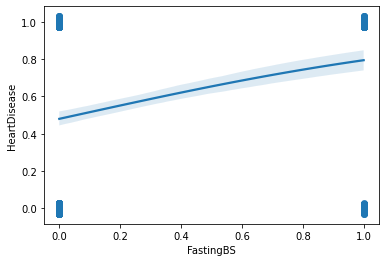

In [373]:
sns.regplot(x= "FastingBS", y = "HeartDisease",
           y_jitter = 0.03,
           data = heart,
           logistic = True)
plt.show()

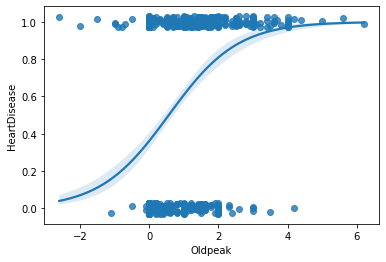

In [374]:
sns.regplot(x= "Oldpeak", y = "HeartDisease",
           y_jitter = 0.03,
           data = heart,
           logistic = True)
plt.show()

In [333]:
y_pred = logreg.predict(X_test)
print('Accuracy of logisticregression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logisticregression classifier on test set: 0.75


<h2> Create Confusion Matrix and Classification Report</h2>

<p> A <b>confusion matrix</b> is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct (true positive and true negatives) and incorrect predictions (false positives and false negatives) are summed up class-wise</p>

In [407]:
#creating confusion matrix 

#importing necessary package to create matrix
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 81  32]
 [ 38 125]]


<p>The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, <b>81</b> and <b>125</b> are actual predictions, and <b>32</b>  and <b>11</b> are incorrect predictions. </p>

In [ ]:
#visualizing the confusion matrix through a heatmap

#import required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

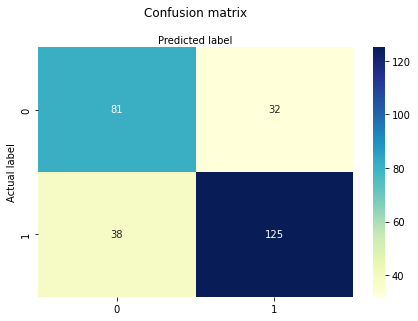

In [340]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

#labeling heat map 
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [341]:
#evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
#accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#precision score
print("Precision:",metrics.precision_score(y_test, y_pred))

#recall score
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7463768115942029
Precision: 0.7961783439490446
Recall: 0.7668711656441718


<p>classification rate of 75%, considered as a good accuracy. </p>
<p> Percision, how accurate is the model. In our prediction case, when your Logistic Regression model predicted patients are going to suffer from heart disease, that patients prediction will be correct 79% of the time.</p>
<p> Recall, If there are patients who have heart disease in the test set and your Logistic Regression model can identify it 77% of the time.</p>

In [342]:
#creating classification report 

#importing proper packages for the report
from sklearn.metrics import classification_report

#printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       113
           1       0.80      0.77      0.78       163

    accuracy                           0.75       276
   macro avg       0.74      0.74      0.74       276
weighted avg       0.75      0.75      0.75       276



<h5> interpreting the above classification report</h5>
<ul>
    <li>
        <b>percision:</b>
        the ratio of true positive/ true positive+false positive</li>
    <li>
        <b>recall:</b>
        the ratio of true postiv/ true positive+false negative</li>
    <li>
        <b>F-beta:</b>
        weighted harmonic mean of the precision and recall, where an F-beta score reaches 1 at best</li>
    <li>
        <b>support:</b>
        number of occurrences of each class in y_test</li>
        
<p>Interpretation: Of the entire test set, 75% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 75% of the customer’s preferred term deposits that were promoted</p>

<h3> ROC Curve</h3>

<p>Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.</p>

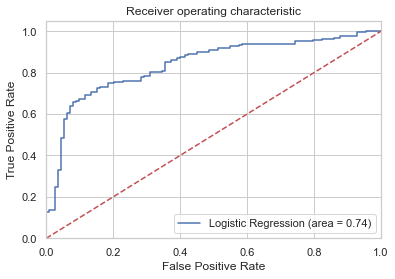

In [96]:
#creating ROC Curve
#importing necessary packages and libraries
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#setting the ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()

#plotting the curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

#labels for the curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h4> Interpretation</h4>
<p> The ROC (the receiver operating characteristic) curve is a common tool with binary classifiers. The red line represents the ROC curve of a purely random classifier. A good classifier stays as far away from the line as possible (as close to the top left corner as possible). </p>

<p> This shows that there is a relatively good true positive rate compared to the ROC curve</p>

<h3> AUC Curve </h3>

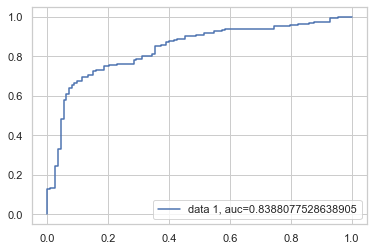

In [101]:
#auc classifier
#similar computation to ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#initializing auc score based on the y_test and y_prep_proba
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h4> Interpretation </h4>

<p> here is the AUC score for this regerssion. An AUC score of 1 represents a perfect classifier. Here, our AUC score is 0.84, so our regression is a relatively good model </p>